In [2]:
import sys
sys.path.append(r'..//')
from ioMicro import *

### Pick a few calibration FOVs

In [3]:
save_folder =r'\\192.168.0.21\bbfishdc21\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\MERFISH_Analysis'
fov,set_ = 'Conv_zscan__219', '_set1'
dec = decoder_simple(save_folder,fov,set_)
dec.ncols = 3
dec.load_decoded()
apply_flat_field(dec)
apply_fine_drift(dec,plt_val=True)
scoresRefT = get_score_per_color(dec)
get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None)
dec.th=-1
plot_statistics(dec)

KeyboardInterrupt: 

In [20]:
viewer = plot_multigenes(dec,genes=['Sox11','Ptbp1','Gad1','Igfbpl1','Dsp','Psap'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=10)

In [21]:
if True:
    if scoresRef is None: scoresRef=scoresRefT
    else: combine_scoresRef(scoresRef,scoresRefT)
    np.save(save_folder+os.sep+'scoresRef.npy',scoresRef)

C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\numpy\lib\npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [11]:
scoresRef = None

### Calibrate smFISH signal

In [26]:
keepf =  dec.scoreA>dec.th ### keep good score
icodesf = dec.icodesN[keepf]
XHfpr = dec.XH_pruned[keepf]
XHf = np.mean(XHfpr,axis=1)
XF = XHf[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
#zc,xc,yc,bk-7,a-6,habs-5,hn-4,h-3
XF[:,-1] = dec.scoreA[keepf]
XF[:,-2] = np.where(keepf)[0]
mnD = np.mean(np.linalg.norm((XHf[:,np.newaxis]-XHfpr)[:,:,:3],axis=-1),axis=-1)
XF[:,-3]=mnD
mnH = np.mean(np.abs((XHf[:,np.newaxis]-XHfpr)[:,:,-3]),axis=-1)
XF[:,-4]=mnH
genesf = dec.gns_names[icodesf]

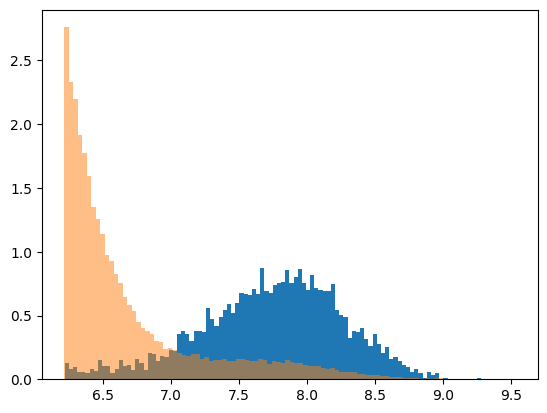

In [34]:
gene = 'Ptbp1'
tagH = 'Ptbp1'


XF_gene = XF[genesf==gene]
icol = XF_gene[0,-5].astype(int)

dec.get_XH_tag(tag = tagH)#Aldh
#Xh = norm_brightness(dec,dec.Xh)
Xh = dec.Xh
Xh = Xh[(Xh[:,-2]==icol)&(Xh[:,-3]>500)]


dsts,inds = cKDTree(Xh[:,:3]).query(XF_gene[:,:3])
Xh_ = Xh[inds[(dsts<10)],:]
plt.hist(np.log(Xh_[:,-3]),bins=100,density=True);
plt.hist(np.log(Xh[:,-3]),bins=100,density=True,alpha=0.5);

In [38]:
[2700,2000,1600]

[2700, 2000, 1600]

### Given the base decoding for each fov, run across all datasets with consistent values

In [1]:
import sys
sys.path.append(r'..\\')
from ioMicro import *
save_folder =r'\\192.168.0.21\bbfishdc21\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\MERFISH_Analysis'
scoresRef = np.load(save_folder+os.sep+'scoresRef.npy',allow_pickle=True)

In [2]:
fov_fls = glob.glob(save_folder+os.sep+'fov*')
elems = [(fov.replace('.zarr',''),fov_fl.split('__')[-1].split('.')[0]) 
 for fov_fl in fov_fls for fov in np.load(fov_fl)]

In [3]:
dec_fls = glob.glob(save_folder+os.sep+"decoded*")
elems_dec = [tuple(fl.split('decoded_')[-1].replace('.npz','').split('--')) for fl in dec_fls]

In [4]:
len(elems_dec),len(elems)

(1454, 1478)

In [5]:
missing = [e for e in elems if e not in elems_dec]

In [6]:
parms = [(set_,int(fov.split('_')[-1])) for fov,set_ in missing]

In [7]:
from workerScope3New import *
for set_,ifov in tqdm(parms[::-1]):
    main_f((set_,ifov),try_mode=True,old_method=True)

  0%|                                                                                           | 0/24 [00:00<?, ?it/s]

Computing fitting on: Conv_zscan__075.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:04<00:00,  2.57s/it]


Computing drift on: Conv_zscan__075.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:28<00:00, 13.12s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:44<00:00,  4.17s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [08:46<00:00, 175.50s/it]


Unfolded molecules: 236.69990515708923
Computed the decoding: 238.5459840297699



100%|███████████████████████████████████████████████████████████████████| 17615546/17615546 [03:20<00:00, 88039.45it/s]


Computed best unique assigment: 203.47007942199707


  4%|███▎                                                                          | 1/24 [36:06<13:50:39, 2166.94s/it]

Computing fitting on: Conv_zscan__074.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set3', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [03:53<00:00,  9.32s/it]


Computing drift on: Conv_zscan__074.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [06:23<00:00, 15.36s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:19<00:00,  3.19s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:54<00:00, 78.17s/it]


Unfolded molecules: 72.03352785110474
Computed the decoding: 70.69247603416443



100%|█████████████████████████████████████████████████████████████████████| 6361431/6361431 [01:10<00:00, 89625.72it/s]


Computed best unique assigment: 72.18112015724182


  8%|██████▌                                                                       | 2/24 [57:40<10:06:07, 1653.06s/it]

Computing fitting on: Conv_zscan__360.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [41:10<00:00, 98.81s/it]


Computing drift on: Conv_zscan__360.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:39<00:00, 13.57s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [02:32<00:00,  6.10s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [09:59<00:00, 199.88s/it]


Unfolded molecules: 255.59861540794373
Computed the decoding: 257.8177924156189



100%|███████████████████████████████████████████████████████████████████| 17480437/17480437 [03:45<00:00, 77608.61it/s]


Computed best unique assigment: 228.6501853466034


 12%|█████████▌                                                                  | 3/24 [2:18:59<18:14:09, 3126.17s/it]

Computing fitting on: Conv_zscan__359.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [39:40<00:00, 95.24s/it]


Computing drift on: Conv_zscan__359.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [06:00<00:00, 14.40s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [03:45<00:00,  9.02s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [11:04<00:00, 221.54s/it]


Unfolded molecules: 267.1494038105011
Computed the decoding: 287.1575765609741



100%|███████████████████████████████████████████████████████████████████| 18998516/18998516 [04:43<00:00, 67054.77it/s]


Computed best unique assigment: 287.0013563632965


 17%|████████████▋                                                               | 4/24 [3:43:56<21:41:26, 3904.33s/it]

Computing fitting on: Conv_zscan__358.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [23:43<00:00, 56.95s/it]


Computing drift on: Conv_zscan__358.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:34<00:00, 13.39s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:02<00:00, 12.09s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [14:34<00:00, 291.34s/it]


Unfolded molecules: 362.0612280368805
Computed the decoding: 392.1663782596588



100%|███████████████████████████████████████████████████████████████████| 21805182/21805182 [18:16<00:00, 19877.24it/s]


Computed best unique assigment: 1101.4975247383118


 21%|███████████████▊                                                            | 5/24 [5:18:02<23:55:11, 4532.17s/it]

Computing fitting on: Conv_zscan__212.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 32.14it/s]


Computing drift on: Conv_zscan__212.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:38<00:00, 13.53s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:27<00:00,  3.49s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:49<00:00, 56.48s/it]


Unfolded molecules: 45.19168972969055
Computed the decoding: 52.70353984832764



100%|█████████████████████████████████████████████████████████████████████| 5149145/5149145 [00:58<00:00, 87635.61it/s]


Computed best unique assigment: 59.68736791610718


 25%|███████████████████                                                         | 6/24 [5:32:18<16:24:41, 3282.32s/it]

Computing fitting on: Conv_zscan__135.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 31.13it/s]


Computing drift on: Conv_zscan__135.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:39<00:00, 13.57s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:23<00:00,  3.36s/it]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:39<00:00, 53.01s/it]


Unfolded molecules: 38.02269673347473
Computed the decoding: 40.547072887420654



100%|█████████████████████████████████████████████████████████████████████| 3866673/3866673 [00:44<00:00, 86217.57it/s]


Computed best unique assigment: 45.54571557044983


 29%|██████████████████████▏                                                     | 7/24 [5:45:35<11:39:49, 2470.00s/it]

Computing fitting on: Conv_zscan__116.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [24:39<00:00, 59.18s/it]


Computing drift on: Conv_zscan__116.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:40<00:00, 13.63s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [06:04<00:00, 14.60s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [09:31<00:00, 190.63s/it]


Unfolded molecules: 215.39575672149658
Computed the decoding: 225.42728805541992



100%|███████████████████████████████████████████████████████████████████| 16266179/16266179 [05:05<00:00, 53208.08it/s]


Computed best unique assigment: 308.86567640304565


 33%|█████████████████████████▎                                                  | 8/24 [6:52:44<13:10:58, 2966.18s/it]

Computing fitting on: Conv_zscan__114.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [30:52<00:00, 74.08s/it]


Computing drift on: Conv_zscan__114.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [06:09<00:00, 14.77s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:15<00:00, 12.60s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [09:42<00:00, 194.23s/it]


Unfolded molecules: 226.54188561439514
Computed the decoding: 232.25530695915222



100%|███████████████████████████████████████████████████████████████████| 15490459/15490459 [05:23<00:00, 47873.93it/s]


Computed best unique assigment: 326.55591225624084


 38%|████████████████████████████▌                                               | 9/24 [8:06:36<14:16:08, 3424.57s/it]

Computing fitting on: Conv_zscan__113.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [23:21<00:00, 56.06s/it]


Computing drift on: Conv_zscan__113.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:34<00:00, 13.39s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [03:01<00:00,  7.26s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [06:53<00:00, 137.97s/it]


Unfolded molecules: 164.29244589805603
Computed the decoding: 161.92597913742065



100%|███████████████████████████████████████████████████████████████████| 12496525/12496525 [03:17<00:00, 63328.30it/s]


Computed best unique assigment: 199.58999800682068


 42%|███████████████████████████████▎                                           | 10/24 [9:00:16<13:04:20, 3361.43s/it]

Computing fitting on: Conv_zscan__112.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [29:18<00:00, 70.36s/it]


Computing drift on: Conv_zscan__112.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:34<00:00, 13.37s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:12<00:00, 12.51s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [09:27<00:00, 189.11s/it]


Unfolded molecules: 212.0345916748047
Computed the decoding: 209.99582433700562



100%|███████████████████████████████████████████████████████████████████| 14048894/14048894 [06:18<00:00, 37111.36it/s]


Computed best unique assigment: 381.2773337364197


 46%|█████████████████████████████████▉                                        | 11/24 [10:11:33<13:08:58, 3641.39s/it]

Computing fitting on: Conv_zscan__111.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [41:41<00:00, 100.07s/it]


Computing drift on: Conv_zscan__111.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:46<00:00, 13.87s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [07:35<00:00, 18.24s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [15:37<00:00, 312.39s/it]


Unfolded molecules: 372.0640425682068
Computed the decoding: 377.45250034332275



100%|███████████████████████████████████████████████████████████████████| 20099725/20099725 [13:52<00:00, 24132.74it/s]


Computed best unique assigment: 836.8919477462769


 50%|█████████████████████████████████████                                     | 12/24 [12:03:33<15:15:36, 4578.07s/it]

Computing fitting on: Conv_zscan__110.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [25:05<00:00, 60.22s/it]


Computing drift on: Conv_zscan__110.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:37<00:00, 13.52s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:02<00:00, 12.12s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [08:58<00:00, 179.36s/it]


Unfolded molecules: 185.89688634872437
Computed the decoding: 177.49693202972412



100%|███████████████████████████████████████████████████████████████████| 12090986/12090986 [04:12<00:00, 47901.35it/s]


Computed best unique assigment: 254.64846086502075


 54%|████████████████████████████████████████                                  | 13/24 [13:05:55<13:12:51, 4324.66s/it]

Computing fitting on: Conv_zscan__075.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:24<00:00, 12.97s/it]


Computing drift on: Conv_zscan__075.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:28<00:00, 13.12s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  7.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.42s/it]


Unfolded molecules: 1.3098554611206055
Computed the decoding: 0.8480091094970703



100%|█████████████████████████████████████████████████████████████████████████| 16972/16972 [00:00<00:00, 89468.87it/s]


Computed best unique assigment: 0.189697265625


 58%|███████████████████████████████████████████▊                               | 14/24 [13:17:08<8:56:57, 3221.76s/it]

Computing fitting on: Conv_zscan__065.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [33:27<00:00, 80.31s/it]


Computing drift on: Conv_zscan__065.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:36<00:00, 13.46s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [07:57<00:00, 19.12s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [11:12<00:00, 224.27s/it]


Unfolded molecules: 246.87126874923706
Computed the decoding: 258.958651304245



100%|███████████████████████████████████████████████████████████████████| 17116214/17116214 [08:37<00:00, 33081.65it/s]


Computed best unique assigment: 520.7523770332336


 62%|██████████████████████████████████████████████▉                            | 15/24 [14:42:53<9:30:14, 3801.62s/it]

Computing fitting on: Conv_zscan__064.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [18:00<00:00, 43.22s/it]


Computing drift on: Conv_zscan__064.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:42<00:00, 13.69s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [06:21<00:00, 15.25s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [08:31<00:00, 170.49s/it]


Unfolded molecules: 161.8320713043213
Computed the decoding: 186.41422080993652



100%|███████████████████████████████████████████████████████████████████| 13908563/13908563 [03:15<00:00, 71212.85it/s]


Computed best unique assigment: 197.96472668647766


 67%|██████████████████████████████████████████████████                         | 16/24 [15:37:33<8:05:56, 3644.50s/it]

Computing fitting on: Conv_zscan__006.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set2', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [15:48<00:00, 37.95s/it]


Computing drift on: Conv_zscan__006.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:42<00:00, 13.69s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [07:12<00:00, 17.28s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [09:09<00:00, 183.33s/it]


Unfolded molecules: 175.54801273345947
Computed the decoding: 175.65905046463013



100%|███████████████████████████████████████████████████████████████████| 13729215/13729215 [03:21<00:00, 68245.71it/s]


Computed best unique assigment: 203.81464886665344


 71%|█████████████████████████████████████████████████████▏                     | 17/24 [16:32:17<6:52:32, 3536.06s/it]

Computing fitting on: Conv_zscan__618.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [26:31<00:00, 63.67s/it]


Computing drift on: Conv_zscan__618.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:45<00:00, 13.80s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [08:21<00:00, 20.05s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [11:35<00:00, 231.98s/it]


Unfolded molecules: 240.06214118003845
Computed the decoding: 253.03007173538208



100%|███████████████████████████████████████████████████████████████████| 16995497/16995497 [08:39<00:00, 32699.06it/s]


Computed best unique assigment: 523.1399419307709


 75%|████████████████████████████████████████████████████████▎                  | 18/24 [17:51:39<6:30:26, 3904.48s/it]

Computing fitting on: Conv_zscan__610.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [41:31<00:00, 99.66s/it]


Computing drift on: Conv_zscan__610.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:42<00:00, 13.71s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [11:46<00:00, 28.28s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [16:27<00:00, 329.05s/it]


Unfolded molecules: 338.5529010295868
Computed the decoding: 389.1736476421356



100%|███████████████████████████████████████████████████████████████████| 23772337/23772337 [19:43<00:00, 20083.17it/s]


Computed best unique assigment: 1188.671882390976


 79%|███████████████████████████████████████████████████████████▍               | 19/24 [19:54:48<6:52:34, 4950.90s/it]

Computing fitting on: Conv_zscan__569.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [27:40<00:00, 66.44s/it]


Computing drift on: Conv_zscan__569.zarr
Computing drift...



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [05:53<00:00, 14.13s/it]


Not completed



100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [06:28<00:00, 15.55s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [10:09<00:00, 203.02s/it]


Unfolded molecules: 204.33598709106445
Computed the decoding: 206.4421248435974



100%|███████████████████████████████████████████████████████████████████| 13922025/13922025 [05:31<00:00, 41980.16it/s]


Computed best unique assigment: 334.28971672058105


 83%|██████████████████████████████████████████████████████████████▌            | 20/24 [21:05:58<5:16:26, 4746.57s/it]

Computing fitting on: Conv_zscan__568.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_3


 88%|█████████████████████████████████████████████████████████████████▋         | 21/24 [21:05:59<2:46:06, 3322.24s/it]

Computing drift on: Conv_zscan__568.zarr
Completed
Computing fitting on: Conv_zscan__567.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set1', '\\\\192.


 92%|████████████████████████████████████████████████████████████████████▊      | 22/24 [21:06:00<1:17:30, 2325.42s/it]

Computing drift on: Conv_zscan__567.zarr
Completed
Computing fitting on: Conv_zscan__566.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set1', '\\\\192.


 96%|█████████████████████████████████████████████████████████████████████████▊   | 23/24 [21:06:01<27:07, 1627.97s/it]

Computing drift on: Conv_zscan__566.zarr
Completed
Computing fitting on: Conv_zscan__143.zarr
25 ['\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P1__Igfbp_Aldh1l1_Ptbp1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H1_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P2_Sox11_Sox2_Dcx__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H2_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P3__Cdk4_Cdk6_Cdk1__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H3_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H4_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P4__Ccnd2_Ccnb2_Cdk2__set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\H5_MER_set1', '\\\\192.168.0.21\\bbfishdc21\\DCBBL1_1year1wkNJ_ASO_SAL_3_31_2023\\P5__Ccne2_Ccnd1_Ccna2_set1', '\\\\192.


100%|█████████████████████████████████████████████████████████████████████████████| 24/24 [21:06:02<00:00, 3165.12s/it]

Computing drift on: Conv_zscan__143.zarr
Completed


In [7]:
fov,set_ = ('Conv_zscan__029', '_set1')
save_final_decoding(save_folder,fov,set_,scoresRef,th=-1.5,plt_val=False,tag_save = 'finaldecs_',apply_flat=False,ncols=3,
                            tags_smFISH=['Aldh','Sox11'],
                            genes_smFISH=[['Igfbpl1','Aldh1l1','Ptbp1'],['Sox11','Sox2','Dcx']],Hths=[10000,10000,8500],force=False)

### Run workerSaveFinal

In [ ]:
#elems = [('Conv_zscan__'+str(ifov).zfill(3),'_'+set_)for set_ in ['set2'] for ifov in dic_f[set_]]
for fov,set_ in tqdm(elems):
    save_final_decoding(save_folder,fov,set_,scoresRef,th=-1.5,plt_val=False,tag_save = 'finaldecs_',apply_flat=False,ncols=3,
                            tags_smFISH=['Aldh','Sox11'],
                            genes_smFISH=[['Igfbpl1','Aldh1l1','Ptbp1'],['Sox11','Sox2','Dcx']],Hths=[10000,10000,8500],force=False)

In [5]:
import sys
sys.path.append(r'..\\')
from ioMicro import *
save_folder =r'\\192.168.0.100\bbfish100\DCBBL1_4week_6_2_2023\MERFISH_Analysis'

In [11]:
fls = glob.glob(save_folder+os.sep+'finaldecs_*')

In [16]:
times = [os.path.getctime(fl) for fl in fls]
np.mean(np.diff(np.sort(times).astype(int)))*900/60

125.64285714285715

### Get counts per cell into a single dataset

In [17]:
import pandas as pd
#save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
#save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
save_folder =r'\\192.168.0.100\bbfish100\DCBBL1_4week_6_2_2023\MERFISH_Analysis'
save_fls = glob.glob(save_folder+os.sep+'finaldecs_*')

In [18]:
len(save_fls)

826

In [90]:
save_fls_ = [fl for fl in save_fls if ('_set3' in fl)]# in fl if '035' in fl][0]
cell_df,df=None,None
for save_fl in tqdm(np.sort(save_fls_)[:]):
    ### load info
    dic = np.load(save_fl)
    XF = dic['XF']
    header = list(dic['header'])
    genes_decoded = dic['genes']
    cells = dic['cellinfo'][1:]
    header_cells = dic['header_cells']
    ### Rethrehold based on score
    iscore = list(header).index('score')
    scoreA = XF[:,iscore]
    keep = scoreA>-1.5
    ugns,gns_i = np.unique(genes_decoded[keep],return_inverse=True)

    icell = header.index('cell_id')
    icells = XF[keep,icell].astype(int)
    
    icellsf = cells[:,0].astype(int)
    
    mcell = np.max(icellsf)+1
    gn_cell,gn_cell_cts = np.unique(mcell*gns_i+icells,return_counts=True)
    len(gn_cell)
    igns_ = gn_cell//mcell
    icells_ = gn_cell%mcell
    Mcts = np.zeros([mcell,len(ugns)])
    Mcts[icells_,igns_]=gn_cell_cts

    Mcts[icellsf].shape
    ifov,iset = int(XF[0,header.index('ifov')]),int(XF[0,header.index('iset')])
    icellsnm = [icell+10**5*ifov for icell in icellsf]#icellsnm = [icell+10**5*ifov+10**9*iset for icell in icellsf]

    dfT = pd.DataFrame(Mcts[icellsf],columns=ugns,index=icellsnm)


    df = dfT if df is None else pd.concat([df,dfT])
    cell_dfT = pd.DataFrame(cells,columns=header_cells,index=icellsnm)
    cell_df = cell_dfT if cell_df is None else pd.concat([cell_df,cell_dfT])

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:34<00:00,  1.38it/s]


In [91]:
save_folder = r'\\192.168.0.100\bbfish100\DCBBL1_4week_6_2_2023\MERFISH_Analysis\final_spots'
if not os.path.exists(save_folder): os.makedirs(save_folder)
df.to_pickle(save_folder+r'\DCBBL1_4week_6_2_2023_set3_df_newCellSeg.pkl')
cell_df.to_pickle(save_folder+r'\DCBBL1_4week_6_2_2023_set3_cell_df_newCellSeg.pkl')

In [112]:
df = pd.read_pickle(save_folder+r'\DCBBL1_4week_6_2_2023_set1_df_newCellSeg.pkl')
cell_df = pd.read_pickle(save_folder+r'\DCBBL1_4week_6_2_2023_set1_cell_df_newCellSeg.pkl')

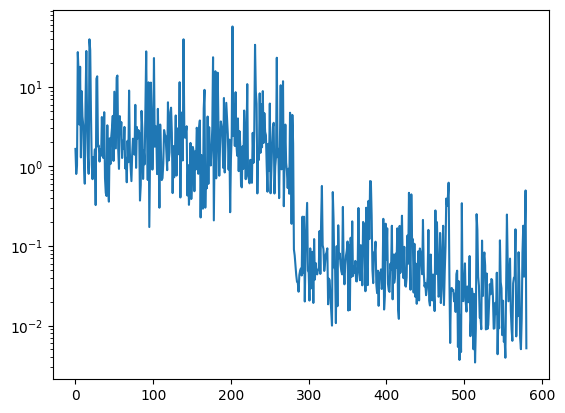

In [113]:
plt.semilogy(np.nanmean(df,axis=0))

In [93]:
          
def plot_gene_mosaic_cells(df,cell_df,gene,plt_fov=False,pixel_size = 0.10833*4,transpose=1,flipx=1,flipy=1,sz_min=1,sz_max=30,nmax=20):
    xcells = cell_df['xc']*pixel_size+cell_df['yfov']
    ycells = cell_df['yc']*pixel_size-cell_df['xfov']

    Xcells = np.array([xcells*flipx,ycells*flipy][::transpose]).T
    
    cts = np.array(df[gene])#Ptbp1_smFISH
    
    cts[np.isnan(cts)]=0
    ncts = np.clip(cts/nmax,0,1)
    size = sz_min+ncts*(sz_max-sz_min)
    from matplotlib import cm as cmap
    cols = cmap.coolwarm(ncts)
    import napari
    good_cells = slice(None)
    XC = -Xcells[good_cells,::-1]
    viewer = napari.view_points(XC,size=size,face_color=cols[good_cells],name=gene)
    if plt_fov:
        ifovs = np.array(list(df.index),dtype=int)//10**5
        ifov_unk = np.unique(ifovs)
        Xfov = np.array([np.mean(XC[ifovs==ifov],axis=0)for ifov in ifov_unk])
        features =  {'fov':ifov_unk}
        text = {
            'string': '{fov:.1f}',
            'size': 20,
            'color': 'gray',
            'translation': np.array([0, 0]),
        }
        viewer.add_points(Xfov,text=text,features=features,edge_width=0)

In [126]:
plot_gene_mosaic_cells(df,cell_df,'Dcx_smFISH',plt_fov=False,pixel_size = 0.10833*4,transpose=-1)

In [57]:
list(df.keys())

['Abhd2',
 'Acer3',
 'Acta2',
 'Actb',
 'Actg1',
 'Adarb2',
 'Adcy1',
 'Adcy2',
 'Adgrl3',
 'Agt',
 'Ahcyl2',
 'Aif1l',
 'Aldh1a1',
 'Aldh1l1_smFISH',
 'Aldoc',
 'Aqp4',
 'Arx',
 'Ascl1',
 'Atp1a2',
 'Atp1b1',
 'Auts2',
 'Bcl2',
 'Bdnf',
 'Bhlhe22',
 'Bmp2',
 'Bmp4',
 'Brinp3',
 'Bsg',
 'Bsn',
 'Btg2',
 'C1qa',
 'C1ql1',
 'C1ql3',
 'Calb1',
 'Calb2',
 'Casp3',
 'Casp9',
 'Cck',
 'Cd14',
 'Cd74',
 'Cdh12',
 'Cdh13',
 'Cdh18',
 'Cdk1',
 'Cdk4',
 'Chrdl1',
 'Clasp1',
 'Cldn5',
 'Cnr1',
 'Cntnap5b',
 'Cox6a1',
 'Csmd1',
 'Cspg4',
 'Cspg5',
 'Cst3',
 'Dcc',
 'Dcx',
 'Dcx_smFISH',
 'Dgat2',
 'Dgkb',
 'Dgkh',
 'Dlx1',
 'Dlx2',
 'Dpysl3',
 'Dsp',
 'Efna5',
 'Egfem1',
 'Eif4a2',
 'Elavl2',
 'Elavl3',
 'Elavl4',
 'Emx1',
 'Emx2',
 'Eomes',
 'Erbb4',
 'Etv4',
 'F3',
 'Fam107a',
 'Fam210b',
 'Fam214a',
 'Fbll1',
 'Flt1',
 'Fos',
 'Foxa1',
 'Foxa2',
 'Foxg1',
 'Frmd4a',
 'Frzb',
 'Fxyd6',
 'Fxyd7',
 'Fyn',
 'Gabbr1',
 'Gabra1',
 'Gabra2',
 'Gad1',
 'Gal',
 'Gda',
 'Gfap',
 'Gja1',
 'Gli1',
 'Gm1007